### Off-Policy Q-Learning

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt


In [4]:

# Initialize environment
env = gym.make('FrozenLake-v1',render_mode="human")
env.reset()

# Initialize Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1
gamma = 0.99
epsilon = 0.1
num_episodes = 1000


In [19]:
# Q-Learning Algorithm Implementation cu penalizare pentru ieșirea din matrice
rewards_q_learning = []
steps_per_episode_q = []


for i in range(num_episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0
    step_count = 0
    env.render()

    while not done:
        # if np.random.rand() < epsilon:
        #     action = env.action_space.sample()  # Acțiune aleatoare
        # else:
        action = np.argmax(Q[state, :])  # Acțiune aleasă prin Q-learning

        # Execută acțiunea
        new_state, reward, done, _, _ = env.step(action)

        # print("____",state," --- ",new_state)
        
        if not done:
            total_reward -= 1
        elif done and reward > 0:
            total_reward+=10000
        else:
            total_reward -=100
            
        if state == new_state:
            reward -= 100
        elif state != new_state:
            reward +=1
        # Actualizarea Q
        Q[state, action] += alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        # Actualizează starea curentă
        state = new_state
        total_reward += reward
        step_count += 1
        print("--",done,"--",reward,"==",total_reward)
        # Vizualizare
        env.render()

    rewards_q_learning.append(total_reward)
    steps_per_episode_q.append(step_count)
    # Dacă jocul s-a terminat (done = True), dăm recompensă pozitivă (exemplu +100)
    if done:
        if reward < 100:
            print(f"Episode {i+1} failed with total reward: {total_reward}.")
        else:
            print(f"Episode {i+1} succeeded with total reward: {total_reward}.")

    

    print(f"Episode {i+1}: Total reward: {total_reward}, Steps: {step_count}")

-- False -- -100.0 == -101.0
-- False -- -100.0 == -202.0
-- False -- 1.0 == -202.0
-- False -- 1.0 == -202.0
-- False -- 1.0 == -202.0
-- False -- 1.0 == -202.0
-- False -- 1.0 == -202.0
-- True -- 1.0 == -301.0
Episode 1 failed with total reward: -301.0.
Episode 1: Total reward: -301.0, Steps: 8
-- False -- 1.0 == 0.0
-- False -- 1.0 == 0.0
-- False -- -100.0 == -101.0
-- False -- 1.0 == -101.0
-- True -- 1.0 == -200.0
Episode 2 failed with total reward: -200.0.
Episode 2: Total reward: -200.0, Steps: 5
-- False -- 1.0 == 0.0
-- False -- 1.0 == 0.0
-- False -- 1.0 == 0.0
-- False -- 1.0 == 0.0
-- False -- -100.0 == -101.0
-- False -- 1.0 == -101.0
-- True -- 1.0 == -200.0
Episode 3 failed with total reward: -200.0.
Episode 3: Total reward: -200.0, Steps: 7
-- False -- 1.0 == 0.0
-- True -- 1.0 == -99.0
Episode 4 failed with total reward: -99.0.
Episode 4: Total reward: -99.0, Steps: 2
-- False -- 1.0 == 0.0
-- False -- 1.0 == 0.0
-- False -- 1.0 == 0.0
-- True -- 1.0 == -99.0
Episode

KeyboardInterrupt: 

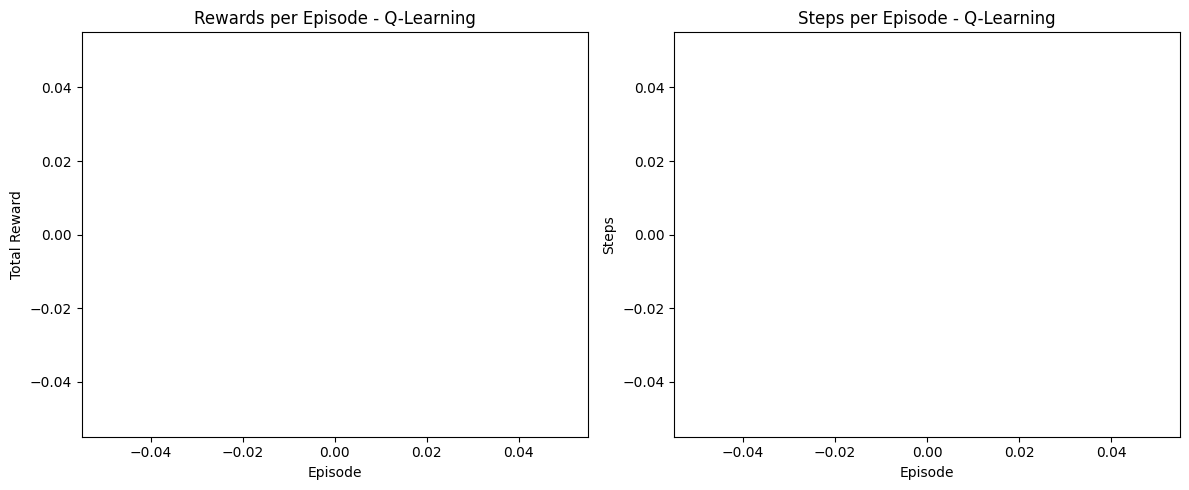

Training complete with Q-Learning


In [6]:

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rewards_q_learning)
plt.title("Rewards per Episode - Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Total Reward")

plt.subplot(1, 2, 2)
plt.plot(steps_per_episode_q)
plt.title("Steps per Episode - Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Steps")

plt.tight_layout()
plt.show()

print("Training complete with Q-Learning")